# 神经网络基础

In [2]:
import torch
import matplotlib.pyplot as plt

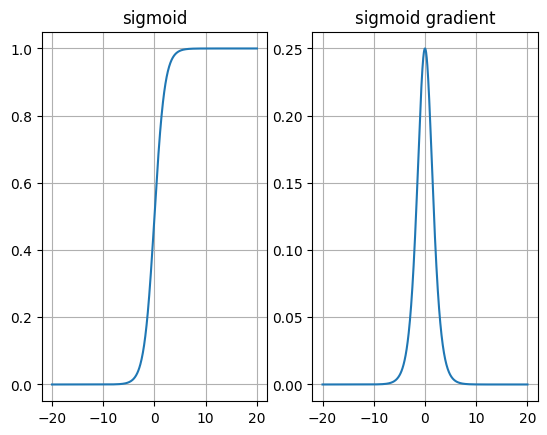

In [10]:
_,axes=plt.subplots(1,2)
x=torch.linspace(-20,20,1000)
y=torch.sigmoid(x)
axes[0].plot(x,y)
axes[0].set_title('sigmoid')
axes[0].grid()

x=torch.linspace(-20,20,1000,requires_grad=True)
y=torch.sigmoid(x).sum()  # 加法不影响互相的梯度
y.backward()
axes[1].plot(x.detach(),x.grad.reshape(-1))
axes[1].set_title('sigmoid gradient')
axes[1].grid()

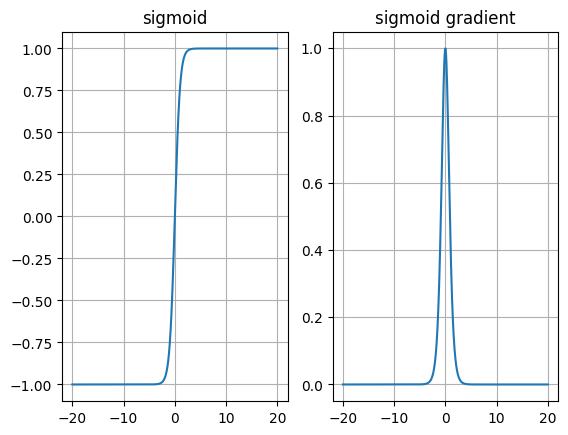

In [11]:
_,axes=plt.subplots(1,2)
x=torch.linspace(-20,20,1000)
y=torch.tanh(x)
axes[0].plot(x,y)
axes[0].set_title('sigmoid')
axes[0].grid()

x=torch.linspace(-20,20,1000,requires_grad=True)
y=torch.tanh(x).sum()  # 加法不影响互相的梯度
y.backward()
axes[1].plot(x.detach(),x.grad.reshape(-1))
axes[1].set_title('sigmoid gradient')
axes[1].grid()

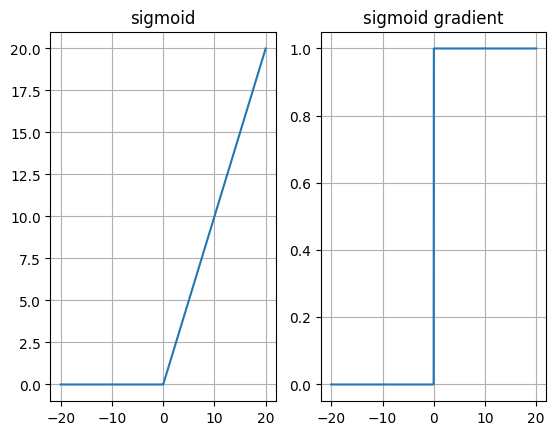

In [12]:
_, axes = plt.subplots(1, 2)
x = torch.linspace(-20, 20, 1000)
y = torch.relu(x)
axes[0].plot(x, y)
axes[0].set_title('sigmoid')
axes[0].grid()

x = torch.linspace(-20, 20, 1000, requires_grad=True)
y = torch.relu(x).sum()  # 加法不影响互相的梯度
y.backward()
axes[1].plot(x.detach(), x.grad.reshape(-1))
axes[1].set_title('sigmoid gradient')
axes[1].grid()

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as  nn
def test01():
    linear=nn.Linear(5,3)
    nn.init.uniform_(linear.weight)
    print(linear.weight.data)
    
def test02():
    linear=nn.Linear(5,3)
    nn.init.constant_(linear.weight,5)
    print(linear.weight.data)
    
def test03():
    linear=nn.Linear(5,3)
    nn.init.normal_(linear.weight,mean=0,std=1)
    print(linear.weight.data)
    
def test04():
    linear=nn.Linear(5,3)
    nn.init.xavier_normal_(linear.weight)
    print(linear.weight.data)
    
def test05():
    linear=nn.Linear(5,3)
    nn.init.xavier_uniform_(linear.weight)
    print(linear.weight.data)
    
def test06():
    linear=nn.Linear(5,3)
    nn.init.kaiming_normal_(linear.weight)
    print(linear.weight.data)
    
def test07():
    linear=nn.Linear(5,3)
    nn.init.kaiming_uniform_(linear.weight)
    print(linear.weight.data)

# 神经网络搭建

In [15]:
# 神经网络搭建
# 一个继承，两个方法
import torch
import torch.nn as nn
from torchsummary import summary
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__() # 调用父类的初始化属性值
        self.linear1=nn.Linear(3,3)
        nn.init.xavier_normal_(self.linear1.weight)
        self.linear2=nn.Linear(3,2)
        nn.init.kaiming_normal_(self.linear2.weight)
        self.out=nn.Linear(2,2)
    def forward(self,x):
        x=self.linear1(x)
        x=torch.sigmoid(x)
        x=self.linear2(x)
        x=torch.relu(x)
        x=self.out(x)
        x=torch.softmax(x,dim=-1)
        
        return x

In [22]:
my_model=Model().to('cuda')
my_data=torch.randn(5,3).to('cuda')
print(my_data.shape)

output=my_model(my_data)
print(output.shape)

summary(my_model,(3,),batch_size=1)

for name,parameter in my_model.named_parameters():
    print(name,parameter)

torch.Size([5, 3])
torch.Size([5, 2])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                     [1, 3]              12
            Linear-2                     [1, 2]               8
            Linear-3                     [1, 2]               6
Total params: 26
Trainable params: 26
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
linear1.weight Parameter containing:
tensor([[-0.2489, -0.6874,  0.8388],
        [ 0.3679, -0.4185, -0.2531],
        [ 0.0179,  0.2829,  0.8117]], device='cuda:0', requires_grad=True)
linear1.bias Parameter containing:
tensor([ 0.0648,  0.5336, -0.2073], device='cuda:0', requires_grad=True)
linear2.weight Parameter containing:
ten